## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [3]:
# Serie 1

def serie1(n):

  sumador = 0
  limite = 2*n
  for i in range (1, limite+1):
    ecuacion = ((((-1)**i)*(i))/(i+1))
    sumador = sumador + ecuacion
  return sumador

# Serie 2

def serie2(n):

  sumador1 = 0
  sumador2 = 0
  for i in range (1,n+1):
    ecuacion1 = (((2*i)-1)/(2*i))
    sumador1 = sumador1 + ecuacion1
  
  for i in range (1,n+1):
    ecuacion2 = (2*i/((2*i)+1))
    sumador2 = sumador2 + ecuacion2
  
  return sumador2 - sumador1

# Serie 3

def serie3(n):
  sumador = 0
  for i in range (1,n+1):
    ecuacion = ((1)/((2*i)*((2*i)+1)))
    sumador = sumador + ecuacion
  
  return sumador

In [9]:
n= 10

print ("el valor de la serie 1 es:",serie1(n))
print ("el valor de la serie 2 es:",serie2(n))
print ("el valor de la serie 3 es:",serie3(n))

el valor de la serie 1 es: 0.2836095492055243
el valor de la serie 2 es: 0.2836095492055257
el valor de la serie 3 es: 0.2836095492055244


## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [26]:
import numpy as np
import matplotlib.pyplot as plt


#Tomando la serie f(xn) = rxn(1-xn) rescribiendola de las siguientes formas

 #1. f(xn) = (r*xn) - (r*(xn)**2)
 #2. f(xn) = (r)*(xn - (xn)**2)
 #3. f(xn) = (r)*(xn - (xn)**2)

# Sabemos que:
#xn = población en un tiempo inicial
#r = diferencial de crecimiento con respecto al tiempo
#xf = poblacion en un tiempo final

# Primer función

def funcion1( xn , r ):

  xn = (r*xn) - (r*(xn)**2)
  
  return xn

#Segunda función

def funcion2( xn , r ):

  xf = (r)*(xn - (xn)**2)
  
  return xf

#Tercera función

def funcion3( xn , r ):

  xf = (r)*(xn - (xn)**2)
  
  return xf



In [22]:
#Mapas logísticos

#xn = población en un tiempo inicial
#r = diferencial de crecimiento con respecto al tiempo
#xfn = poblacion en un tiempo final (con n = 1,2 o 3 dependiendo del numero del mapa logistico "mpln")

# Mapa logistico primera funcion

def mpl1(xn,r,N):

  xf1 = np.zeros(N)
  for i in range(0, N):
    xn = funcion1( xn, r )
    xf1[i] = xn

  return xf1

# Mapa logistico segunda funcion

def mpl2(xn,r,N):

  xf2 = np.zeros(N)
  for i in range(0, N):
    xn = funcion2( xn, r )
    xf2[i] = xn

  return xf2

# Mapa logistico tercera funcion

def mpl3(xn,r,N):

  xf3 = np.zeros(N)
  for i in range(0, N):
    xn = funcion3( xn, r )
    xf3[i] = xn

  return xf3


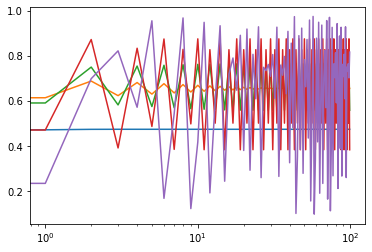

In [32]:
# Graficacion
# Mapa logistico primera funcion

N = 100
array = np.arange(0,N, 1)
r = [1.9,2.9,3.1,3.5,3.9]
xinicial = 0.6

plt.figure()

for i in range (0, len(r)):

  plot = mpl1(xinicial, r[i], N)
  plt.plot(array, plot, label=""+str(r[i])+"")

plt.xscale("log")
plt.show()

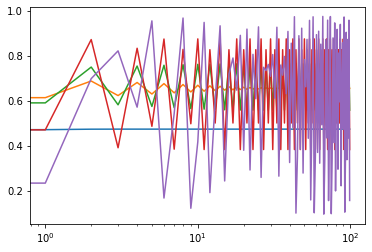

In [34]:
# Graficacion
# Mapa logistico segunda funcion

N = 100
array = np.arange(0,N, 1)
r = [1.9,2.9,3.1,3.5,3.9]
xinicial = 0.6

plt.figure()

for i in range (0, len(r)):

  plot = mpl2(xinicial, r[i], N)
  plt.plot(array, plot, label=""+str(r[i])+"")

plt.xscale("log")
plt.show()

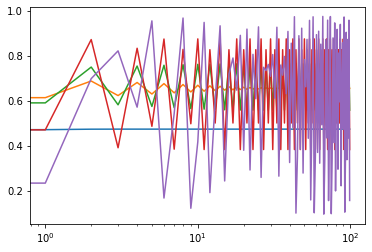

In [35]:
#graficacion
# Mapa logistico tercera funcion

N = 100
array = np.arange(0,N, 1)
r = [1.9,2.9,3.1,3.5,3.9]
xinicial = 0.6

plt.figure()

for i in range (0, len(r)):

  plot = mpl3(xinicial, r[i], N)
  plt.plot(array, plot, label=""+str(r[i])+"")

plt.xscale("log")
plt.show()